In [1]:
#importing the libraries we need
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#reading the CSV files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
#function used to make a bar plot about the survivals with respect to the features given
def stack_bar_plot(feature)    :
    survived= train[train['Survived']==1][feature].value_counts()
    dead  =train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

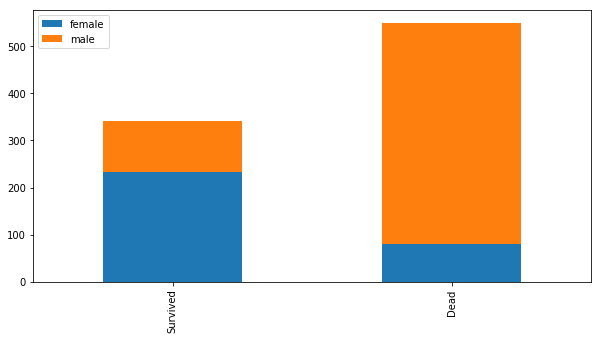

In [8]:
#making a bar plot about the survivals with respect to thier sex
stack_bar_plot('Sex')

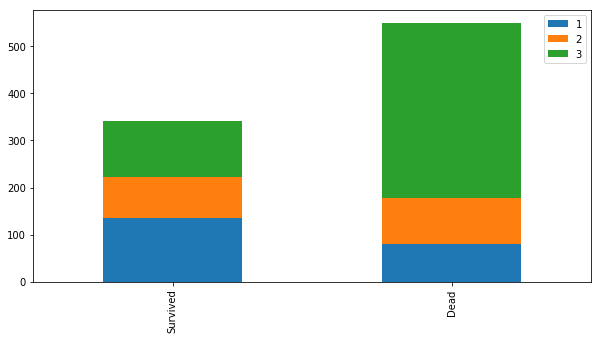

In [9]:
#making a bar plot about the survivals with respect to thier class
stack_bar_plot('Pclass')

In [10]:
#making a copy of the train and test data
train_exp=train.copy()
test_exp=test.copy()

In [11]:
#exctracting the Title of every name of the train and test sets
train_exp['Title']=train_exp['Name'].str.extract('([A-Za-z]+)\.')
test_exp['Title']=test['Name'].str.extract('([A-Za-z]+)\.')

In [12]:
train_exp['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Capt          1
Ms            1
Don           1
Lady          1
Mme           1
Sir           1
Jonkheer      1
Countess      1
Name: Title, dtype: int64

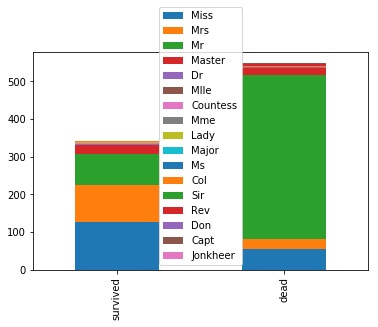

In [13]:
#making a stacked bar the survivals with respect to thier titles

survived=train_exp[train_exp['Survived']==1]['Title'].value_counts()
dead=train_exp[train_exp['Survived']==0]['Title'].value_counts()


df=pd.DataFrame([survived,dead])
df.index=['survived','dead']
df.plot(kind='bar',stacked=True)

In [14]:
#maping the titles into numerical values

title_map={'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Dr':3,'Rev':3,'Col':3,'Mlle':3,'Major':3
,'Don':3,'Jonkheer':3,'Capt':3,'Countess':3,'Sir':3,'Ms':3,'Mme':3,'Lady':3}

train_exp['Title']=train_exp['Title'].map(title_map)
test_exp['Title']=test_exp['Title'].map(title_map)

In [15]:
train_exp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [16]:
test_exp.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [17]:
#droping the name feature scince we don't need it anymore
train_exp.drop(['Name'],axis=1,inplace=True)
test_exp.drop(['Name'],axis=1,inplace=True)

In [18]:
#maping the sexes into numerical values

age_map={'male':0,'female':1}

train_exp['Sex']=train_exp['Sex'].map(age_map)
test_exp['Sex']=test_exp['Sex'].map(age_map)

In [19]:
train_exp.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


In [20]:
#filling the missing values of the age feature with respect to the mean of the titles groups

train_exp['Age'].fillna(train_exp.groupby('Title')['Age'].transform('median'),inplace=True)

test_exp['Age'].fillna(test_exp.groupby('Title')['Age'].transform('median'),inplace=True)

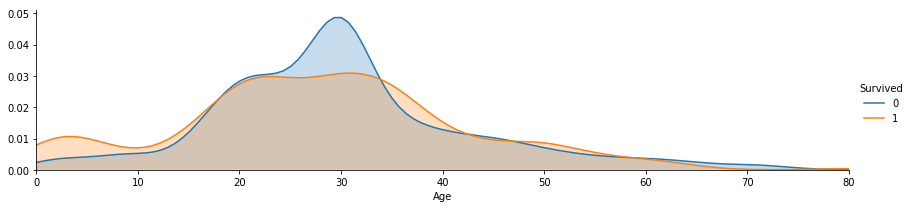

In [21]:
#the destripution of the age with respect the survivality ratio

import seaborn as sns
facet=sns.FacetGrid(train_exp,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train_exp['Age'].max()))
facet.add_legend()
plt.show()

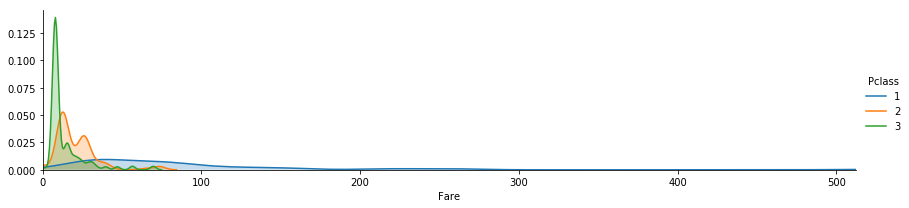

In [22]:
#the destripution of the fare with respect the Pclass ratio

facet=sns.FacetGrid(train_exp,hue='Pclass',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train_exp['Fare'].max()))
facet.add_legend()
plt.show()

In [23]:
train_exp.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


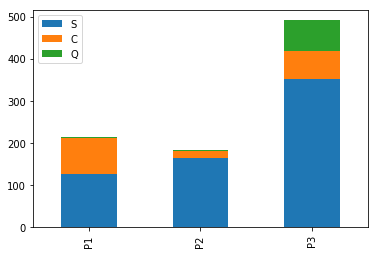

In [24]:
#making a stacked bar the classes with respect to the Embarked

P1=train_exp[train_exp['Pclass']==1]['Embarked'].value_counts()
P2=train_exp[train_exp['Pclass']==2]['Embarked'].value_counts()
P3=train_exp[train_exp['Pclass']==3]['Embarked'].value_counts()

df=pd.DataFrame([P1,P2,P3])
df.index=['P1','P2','P3']
df.plot(kind='bar',stacked=True)


In [25]:
train_exp['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
#filling the missing data in Embarked

test_exp['Embarked'].fillna('S',inplace=True)
train_exp['Embarked'].fillna('S',inplace=True)

In [27]:
#maping the Embarked into numerical values

Emap={'S':2,'C':1,'Q':0}
train_exp['Embarked']=train_exp['Embarked'].map(Emap)
test_exp['Embarked']=test_exp['Embarked'].map(Emap)

In [28]:
train_exp.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,2,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,2,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,2,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,0,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,2,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,2,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,2,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,1,2


In [29]:
#exreacting the cabin letter by the p class number
P1=train_exp[train_exp['Pclass']==1]['Cabin'].str.extract('([A-Za-z])')[0].value_counts()
P2=train_exp[train_exp['Pclass']==2]['Cabin'].str.extract('([A-Za-z])')[0].value_counts()
P3=train_exp[train_exp['Pclass']==3]['Cabin'].str.extract('([A-Za-z])')[0].value_counts()

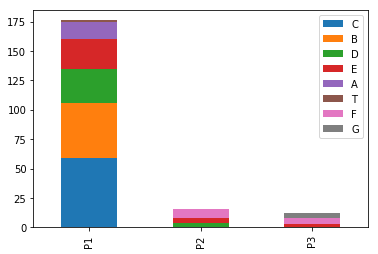

In [30]:
#making a new column which is the letter of the cabin
train_exp['Cabin_let']=train_exp['Cabin'].str.extract('([A-Za-z])')
test_exp['Cabin_let']=test_exp['Cabin'].str.extract('([A-Za-z])')
cabin_dead=train_exp[train_exp['Survived']==0]['Cabin'].str.extract('([A-Za-z])')[0].value_counts()

#visualising the destribution of the cabin letter at every pclass
df=pd.DataFrame([P1,P2,P3])
df.index=["P1",'P2','P3']
df.plot(kind='bar',stacked=True)

In [31]:
P1

C    59
B    47
D    29
E    25
A    15
T     1
Name: 0, dtype: int64

In [32]:
P2

F    8
D    4
E    4
Name: 0, dtype: int64

In [33]:
P3

F    5
G    4
E    3
Name: 0, dtype: int64

In [34]:
#maping the cabin letters by numerical values

Cabmap={'T':0,'A':0.4,'B':0.8,'C':1.2,'D':1.6,'E':2,'F':2.4,'G':2.8}

train_exp['Cabin_let']=train_exp['Cabin_let'].map(Cabmap)
test_exp['Cabin_let']=test_exp['Cabin_let'].map(Cabmap)

In [35]:
#filling the missing data of the cabin_let by it's mean W.R.T every pclass
train_exp['Cabin_let'].fillna(train_exp.groupby('Pclass')['Cabin_let'].transform('median'),inplace=True)
test_exp['Cabin_let'].fillna(test_exp.groupby('Pclass')['Cabin_let'].transform('median'),inplace=True)

#droping the cabin feature since we don't need it any more
train_exp.drop(['Cabin'],axis=1,inplace=True)

In [36]:
train_exp.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Cabin_let
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,2,0,2.4
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1,2,1.2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2,1,2.4
3,4,1,1,1,35.0,1,0,113803,53.1000,2,2,1.2
4,5,0,3,0,35.0,0,0,373450,8.0500,2,0,2.4


In [37]:
#combining the sibsp and parch features into on 'family' num
#we add one to every sum to include the passenger themselves

Family_num=train_exp['SibSp']+train_exp['Parch']+1
Family_numt=test_exp['SibSp']+test_exp['Parch']+1

train_exp['Fam_Num'] = Family_num
test_exp['Fam_Num'] = Family_numt

In [38]:
train_exp['Fam_Num'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Fam_Num, dtype: int64

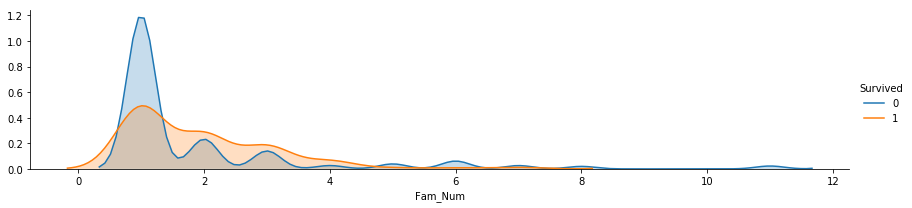

In [39]:
#the death distribution over the family numbers

survived=train_exp[train_exp['Survived']==1]['Fam_Num'].value_counts()
dead=train_exp[train_exp['Survived']==0]['Fam_Num'].value_counts()

facet=sns.FacetGrid(train_exp,hue='Survived',aspect=4)
facet.map(sns.kdeplot,"Fam_Num",shade=True)
facet.add_legend()

In [40]:
train_exp['Fam_Num'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Fam_Num, dtype: int64

In [41]:
#maping the family numbers to values from 0 to 3.2


famap={1:0 ,  2:0.4 , 3:0.8 , 4:1.2 , 5:1.6 , 6:2 , 7:2.4 , 8:2.8 , 11:3.2}
train_exp['Fam_Num']=train_exp['Fam_Num'].map(famap)

famap={1:0 ,  2:0.4 , 3:0.8 , 4:1.2 , 5:1.6 , 6:2 , 7:2.4 , 8:2.8 , 11:3.2}
test_exp['Fam_Num']=test_exp['Fam_Num'].map(famap)

In [42]:
train_exp.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Cabin_let,Fam_Num
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,2,0,2.4,0.4
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1,2,1.2,0.4
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2,1,2.4,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,2,2,1.2,0.4
4,5,0,3,0,35.0,0,0,373450,8.0500,2,0,2.4,0.0
5,6,0,3,0,30.0,0,0,330877,8.4583,0,0,2.4,0.0
6,7,0,1,0,54.0,0,0,17463,51.8625,2,0,2.0,0.0
7,8,0,3,0,2.0,3,1,349909,21.0750,2,3,2.4,1.6
8,9,1,3,1,27.0,0,2,347742,11.1333,2,2,2.4,0.8
9,10,1,2,1,14.0,1,0,237736,30.0708,1,2,2.2,0.4


(0, 18)

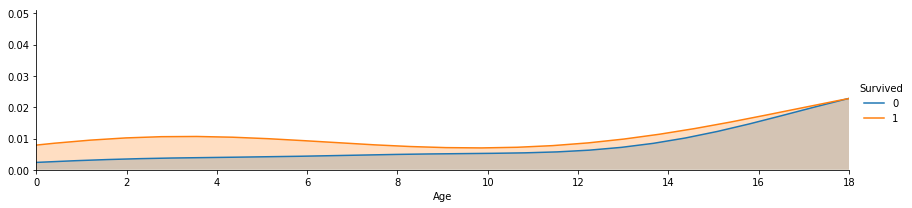

In [43]:
#figuring out some boundries to map ranges of the Age feature

facet=sns.FacetGrid(train_exp,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.add_legend()
plt.xlim(0,18)

(18, 23)

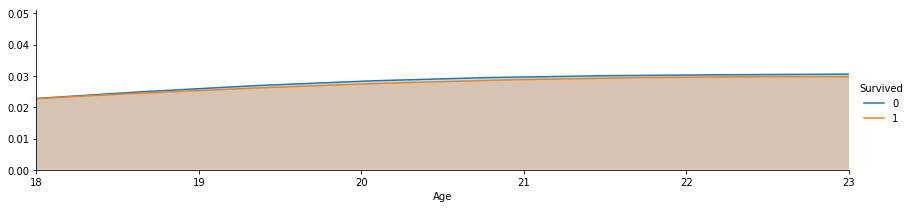

In [44]:
#figuring out some boundries to map ranges of the Age feature

facet=sns.FacetGrid(train_exp,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.add_legend()
plt.xlim(18,23)

(23, 34)

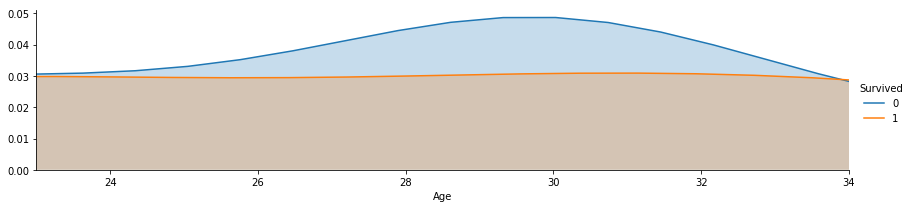

In [45]:
#figuring out some boundries to map ranges of the Age feature

facet=sns.FacetGrid(train_exp,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.add_legend()
plt.xlim(23,34)

(34, 44)

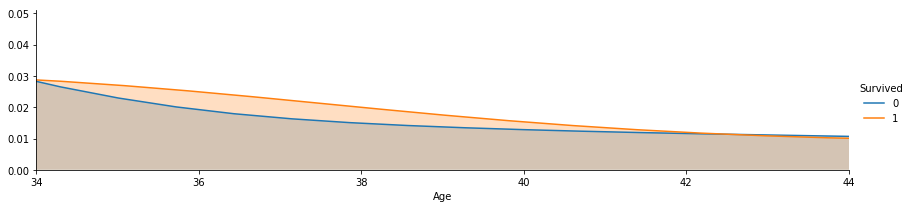

In [46]:
#figuring out some boundries to map ranges of the Age feature

facet=sns.FacetGrid(train_exp,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.add_legend()
plt.xlim(34,44)

(44, 60)

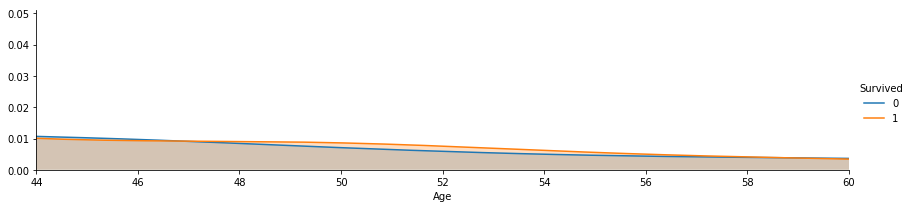

In [47]:
#figuring out some boundries to map ranges of the Age feature

facet=sns.FacetGrid(train_exp,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.add_legend()
plt.xlim(44,60)

(60, 80)

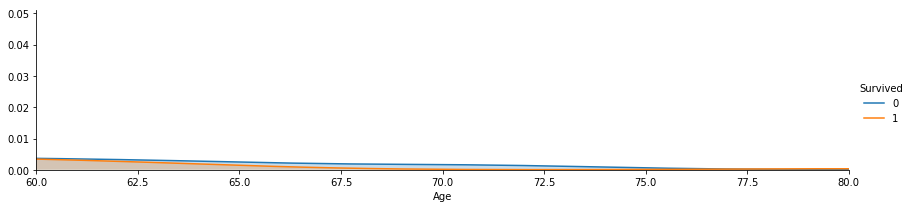

In [48]:
#figuring out some boundries to map ranges of the Age feature

facet=sns.FacetGrid(train_exp,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.add_legend()
plt.xlim(60,80)

In [49]:
#mapping ranges of ages to specific numerical values  

train_exp.loc[(train_exp['Age']<=18),"Age"]=0
train_exp.loc[(train_exp['Age']>18) & (train_exp['Age']<=23),"Age"]=0.6
train_exp.loc[(train_exp['Age']>23) & (train_exp['Age']<=34),"Age"]=1.2
train_exp.loc[(train_exp['Age']>34) & (train_exp['Age']<=44),"Age"]=1.8
train_exp.loc[(train_exp['Age']>44) & (train_exp['Age']<=60),"Age"]=2.4
train_exp.loc[(train_exp['Age']>60),"Age"]=3

test_exp.loc[(test_exp['Age']<=18),"Age"]=0
test_exp.loc[(test_exp['Age']>18) & (test_exp['Age']<=23),"Age"]=0.6
test_exp.loc[(test_exp['Age']>23) & (test_exp['Age']<=34),"Age"]=1.2
test_exp.loc[(test_exp['Age']>34) & (test_exp['Age']<=44),"Age"]=1.8
test_exp.loc[(test_exp['Age']>44) & (test_exp['Age']<=60),"Age"]=2.4
test_exp.loc[(test_exp['Age']>60),"Age"]=3

In [50]:
train_exp.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Cabin_let,Fam_Num
0,1,0,3,0,0.6,1,0,A/5 21171,7.2500,2,0,2.4,0.4
1,2,1,1,1,1.8,1,0,PC 17599,71.2833,1,2,1.2,0.4
2,3,1,3,1,1.2,0,0,STON/O2. 3101282,7.9250,2,1,2.4,0.0
3,4,1,1,1,1.8,1,0,113803,53.1000,2,2,1.2,0.4
4,5,0,3,0,1.8,0,0,373450,8.0500,2,0,2.4,0.0


(0, 17)

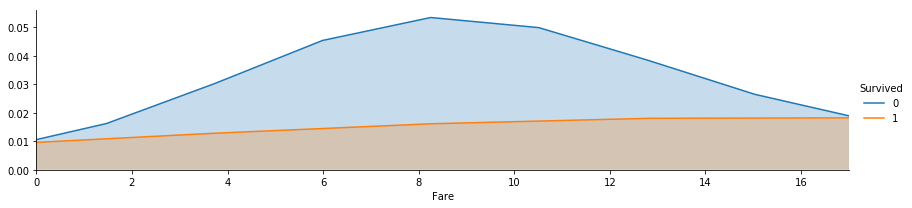

In [51]:
#figuring out some boundries to map ranges of the faire feature

facet=sns.FacetGrid(train_exp,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.add_legend()
plt.xlim(0,17)

(17, 28)

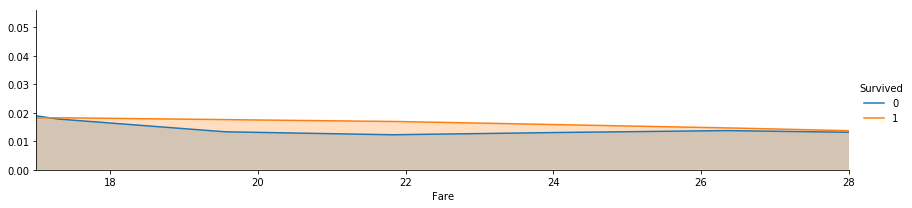

In [52]:
#figuring out some boundries to map ranges of the faire feature

facet=sns.FacetGrid(train_exp,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.add_legend()
plt.xlim(17,28)

(28, 100)

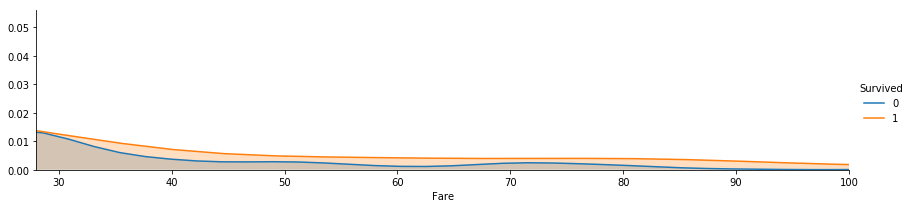

In [53]:
#figuring out some boundries to map ranges of the faire feature

facet=sns.FacetGrid(train_exp,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.add_legend()
plt.xlim(28,100)

(100, 300)

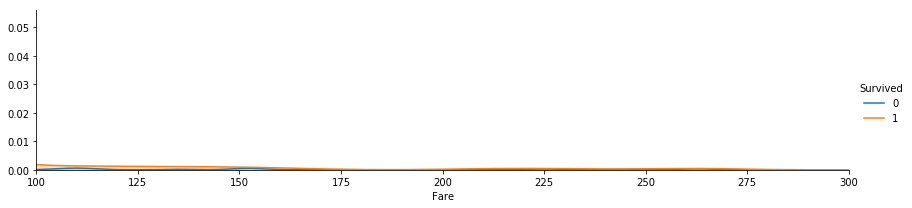

In [54]:
#figuring out some boundries to map ranges of the faire feature

facet=sns.FacetGrid(train_exp,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.add_legend()
plt.xlim(100,300)

In [55]:
##mapping ranges of fair to specific numerical values  

train_exp.loc[(train_exp['Fare']<=17),"Fare"]=0
train_exp.loc[(train_exp['Fare']>17) & (train_exp['Fare']<=28),"Fare"]=1
train_exp.loc[(train_exp['Fare']>28) & (train_exp['Fare']<=100),"Fare"]=2
train_exp.loc[(train_exp['Fare']>100),"Fare"]=3

test_exp.loc[(test_exp['Fare']<=17),"Fare"]=0
test_exp.loc[(test_exp['Fare']>17) & (test_exp['Fare']<=28),"Fare"]=1
test_exp.loc[(test_exp['Fare']>28) & (test_exp['Fare']<=100),"Fare"]=2
test_exp.loc[(test_exp['Fare']>100),"Fare"]=3

In [56]:
train_exp.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Cabin_let,Fam_Num
0,1,0,3,0,0.6,1,0,A/5 21171,0.0,2,0,2.4,0.4
1,2,1,1,1,1.8,1,0,PC 17599,2.0,1,2,1.2,0.4
2,3,1,3,1,1.2,0,0,STON/O2. 3101282,0.0,2,1,2.4,0.0
3,4,1,1,1,1.8,1,0,113803,2.0,2,2,1.2,0.4
4,5,0,3,0,1.8,0,0,373450,0.0,2,0,2.4,0.0
5,6,0,3,0,1.2,0,0,330877,0.0,0,0,2.4,0.0
6,7,0,1,0,2.4,0,0,17463,2.0,2,0,2.0,0.0
7,8,0,3,0,0.0,3,1,349909,1.0,2,3,2.4,1.6
8,9,1,3,1,1.2,0,2,347742,0.0,2,2,2.4,0.8
9,10,1,2,1,0.0,1,0,237736,2.0,1,2,2.2,0.4


In [57]:
train_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null int64
Title          891 non-null int64
Cabin_let      891 non-null float64
Fam_Num        891 non-null float64
dtypes: float64(4), int64(8), object(1)
memory usage: 90.6+ KB


In [58]:
#saving the preprocessed data
train_exp.to_excel('train_exp.xlsx')

In [59]:
test_exp.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabin_let,Fam_Num
0,892,3,0,1.8,0,0,330911,0.0,NaN,0,0.0,2.4,0.0
1,893,3,1,2.4,1,0,363272,0.0,NaN,2,2.0,2.4,0.4
2,894,2,0,3.0,0,0,240276,0.0,NaN,0,0.0,2.4,0.0
3,895,3,0,1.2,0,0,315154,0.0,NaN,2,0.0,2.4,0.0
4,896,3,1,0.6,1,1,3101298,0.0,NaN,2,2.0,2.4,0.8
5,897,3,0,0.0,0,0,7538,0.0,NaN,2,0.0,2.4,0.0
6,898,3,1,1.2,0,0,330972,0.0,NaN,0,1.0,2.4,0.0
7,899,2,0,1.2,1,1,248738,2.0,NaN,2,0.0,2.4,0.8
8,900,3,1,0.0,0,0,2657,0.0,NaN,1,2.0,2.4,0.0
9,901,3,0,0.6,2,0,A/4 48871,1.0,NaN,2,0.0,2.4,0.8


In [60]:
#droping the unneccessary features
test_exp.drop(['SibSp','Parch','Ticket','Cabin'],inplace=True,axis=1)

In [61]:
#saving the preprocessed data
test_exp.to_excel('text_exp.xlsx')

In [62]:
test_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
Fare           417 non-null float64
Embarked       418 non-null int64
Title          417 non-null float64
Cabin_let      418 non-null float64
Fam_Num        418 non-null float64
dtypes: float64(5), int64(4)
memory usage: 29.5 KB
